#Projeto 1

##Limpeza e Análise de Dados

Os datasets utilizados contêm informações sobre os candidatos de um determinado processo seletivo.

###Features

* **employee_id:** ID único do funcionário;
* **department:** departamento do funcionário;
* **region:** região de emprego (não ordenada);
* **education:** nível educacional do funcionário;
* **gender:** gênero do funcionário
* **recruitment_channel:** canal de recrutamento para o funcionário;
* **no_ of_ trainings:** número de treinamentos completados em anos passados,
sejam em soft skills, technical skills, etc.
* **age:** idade do funcionário;
* **previous_ year_ rating:** avaliação do funcionário para o ano anterior;
* **length_ of_ service:** duração do serviço em anos;
* **awards_ won?:** se ganhou algum prêmio em anos anteriores, recebe 1, do
contrário 0;
* **avg_ training_ score:** pontuação média nas avaliações de treinamento atuais;

###Target

* **is_promoted:** recomendado ou não para promoção.

##Bibliotecas que serão utilizadas

In [ ]:
#chamando nossos 4 cavaleiros do apocalipse
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv') # Dataset que será utilizado, futuramente, para treinar o modelo.
df.set_index("employee_id", inplace=True) # Define a coluna ID como índice (evita que essa interfira na predição).

## Informações gerais sobre o dataset

Para entender melhor como o dataset está organizado irei utilizar a função `head` para mostrar as 10 primeiras linhas do dataset.

In [ ]:
df.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0
65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0
58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31,3.0,7,0,85.0,0
20379,Operations,region_20,Bachelor's,f,other,1.0,31,3.0,5,0,59.0,0
16290,Operations,region_34,Master's & above,m,sourcing,1.0,33,3.0,6,0,63.0,0
73202,Analytics,region_20,Bachelor's,m,other,1.0,28,4.0,5,0,83.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       49962 non-null  float64
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    47350 non-null  float64
 11  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 5.4+ MB


Observações iniciais:
* Temos 54808 entradas na coluna de _target_. Assim, analisando as outras colunas percebemos que várias estão com dados faltantes (e não são poucos);
* Além disso, temos 5 _features_ com dtype = object, o que isso significa que se tratam de dados categóricos.

# Dados Categóricos

Vamos vizualizar os dados categóricos.Uma forma de realizar isso seria utilizando o método describe, mas apenas incluindo as colunas de dados categóricos.

In [ ]:
df.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,10,35,3,5,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,35010,30446


**OBSERVAÇÃO IMPORTANTE**: Na coluna gender deveria ter apenas duas classificações. Portanto, precisamos entender o que está acontecendo com essas colunas.

In [ ]:
print("GENDER column unique values:")
print(pd.Series(df.gender.unique()), end='\n\n')

GENDER column unique values:
0                                   f
1                                   m
2                                MALE
3                              fEMALE
4    eu sou homem hetero homossexual!
dtype: object



In [ ]:
print("DEPARTMENT column unique values:")
print(pd.Series(df.department.unique()), end='\n\n')

DEPARTMENT column unique values:
0     Sales & Marketing
1            Operations
2            Technology
3             Analytics
4                   R&D
5           Procurement
6               Finance
7                    HR
8                 Legal
9    quem trouxe quenga
dtype: object



In [ ]:
print("REGION column unique values:")
print(pd.Series(df.region.unique()), end='\n\n')

REGION column unique values:
0                 region_7
1                region_22
2                region_19
3                region_23
4                region_26
5                 region_2
6                region_20
7                region_34
8                 region_1
9                 region_4
10               region_29
11               region_31
12               region_15
13               region_14
14               region_11
15                region_5
16               region_28
17               region_17
18               region_13
19               region_16
20               region_25
21               region_10
22               region_27
23               region_30
24               region_12
25               region_21
26                region_8
27               region_32
28                region_6
29               region_33
30               region_24
31                region_3
32                region_9
33               region_18
34    casa da lu na suecia
dtype: object



In [ ]:
print("EDUCATION column unique values:")
print(pd.Series(df.education.unique()), end='\n\n')

EDUCATION column unique values:
0    Master's & above
1          Bachelor's
2                 NaN
3     Below Secondary
dtype: object



In [ ]:
print("RECRUITMENT CHANNEL column unique values:")
print(pd.Series(df.recruitment_channel.unique()), end='\n\n')

RECRUITMENT CHANNEL column unique values:
0    sourcing
1       other
2    referred
dtype: object



A partir da observação dos valores, é possível notar um problema de representação da coluna gender devido diferenças nas strings. Além disso, há informações incorretas em department and region. Para resolver tal problema iremos apenas usar um `.replace` para manter um padrão dentro das colunas e corrigir os dados incorretos.

## Trocando os dados categóricos

In [ ]:
# Substitui "MALE" por "m".
df["gender"].replace("MALE", "m", inplace=True)

# Substitui "fEMALE" por "f".
df["gender"].replace("fEMALE", "f", inplace=True)

# Substitui "eu sou homem hetero homossexual!" por "m"
df["gender"].replace("eu sou homem hetero homossexual!", "m", inplace=True)

# Substitui "quem trouxe quenga" por "Other"
df["department"].replace("quem trouxe quenga", "Other", inplace=True)

# Substitui "casa da lu na suecia" por "Other"
df["region"].replace("casa da lu na suecia", "Other", inplace=True)

Dados atualizados:

In [ ]:
print("GENDER column unique values:")
print(pd.Series(df.gender.unique()), end='\n\n')

GENDER column unique values:
0    f
1    m
dtype: object



In [ ]:
print("DEPARTMENT column unique values:")
print(pd.Series(df.department.unique()), end='\n\n')

DEPARTMENT column unique values:
0    Sales & Marketing
1           Operations
2           Technology
3            Analytics
4                  R&D
5          Procurement
6              Finance
7                   HR
8                Legal
9                Other
dtype: object



In [ ]:
print("REGION column unique values:")
print(pd.Series(df.region.unique()), end='\n\n')

REGION column unique values:
0      region_7
1     region_22
2     region_19
3     region_23
4     region_26
5      region_2
6     region_20
7     region_34
8      region_1
9      region_4
10    region_29
11    region_31
12    region_15
13    region_14
14    region_11
15     region_5
16    region_28
17    region_17
18    region_13
19    region_16
20    region_25
21    region_10
22    region_27
23    region_30
24    region_12
25    region_21
26     region_8
27    region_32
28     region_6
29    region_33
30    region_24
31     region_3
32     region_9
33    region_18
34        Other
dtype: object



Com isso, conseguimos adequar nossos dados categóricos a fim de termos dados consistentes. Em seguida, podemos visualizar e entender melhor esses dados. 

## Plotando alguns gráficos categóricos

Quando estamos lidando com dados categóricos, é importante utilizarmos gráficos simples, como de barras apenas para entender a distribuição de tais dados dentro do nosso _dataset_. É importante termos em mente que sempre precisamos deixar nossos gráficos o mais intuitivo possível, isso porque muitas vezes nossos notebook serão olhados por pessoas de outras áreas como de negócios.

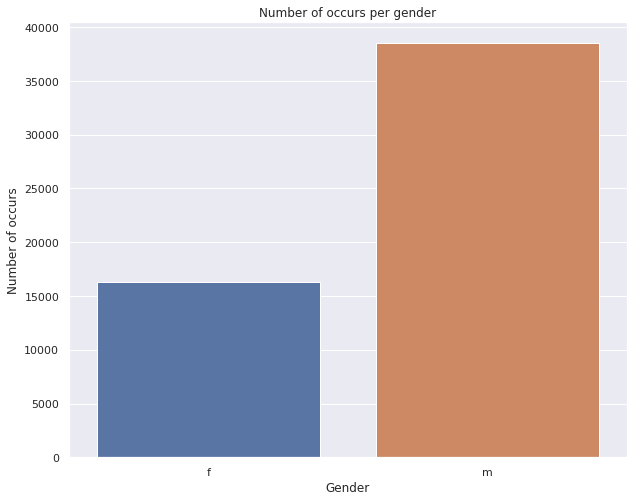

In [ ]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['gender'])
plt.xlabel("Gender")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per gender')
plt.show()

Podemos ver que, em nosso dataset, o número de pessoas do sexo masculino é bem maior que o número de pessoas do sexo feminino. Isso significa que a empresa (informações do dataset) é majoritariamente masculina.

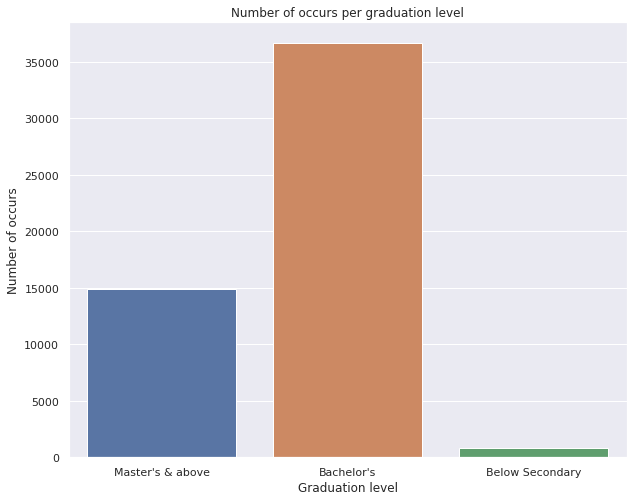

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['education'])
plt.xlabel("Graduation level")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per graduation level')
plt.show()

Podemos perceber que o número de funcionários que trabalham nessa empresa apresentam alta formação acadêmica, sendo que a maioria possui formação em bacharelado (graduação) e quase metade possui pós-graduação.

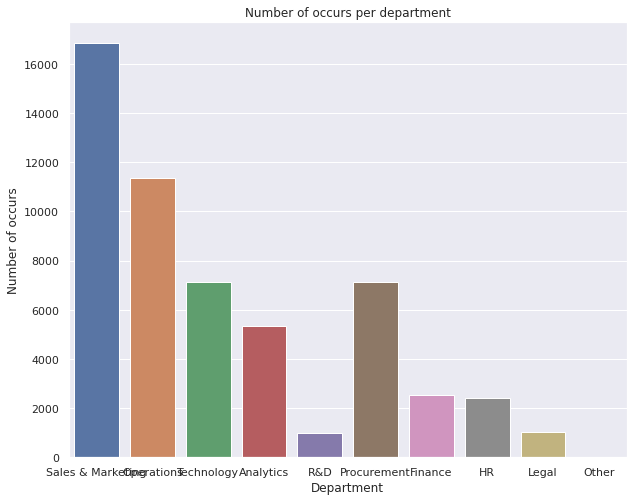

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['department'])
plt.xlabel("Department")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per department')
plt.show()

O gráfico acima indica que maior parte dos funcionários trabalham nas áreas de marketing e operações. Pode-se observar que a coluna Other que foi substituída pelos dados incoerentes apresenta um número extremamente baixo. Desse modo, temos a opção de retirar esse dado já que não interfere significamente no departamento. Entretanto, iremos analisar o restante das features para confirmar se retirar esse dados não interfere nessas outras features. 

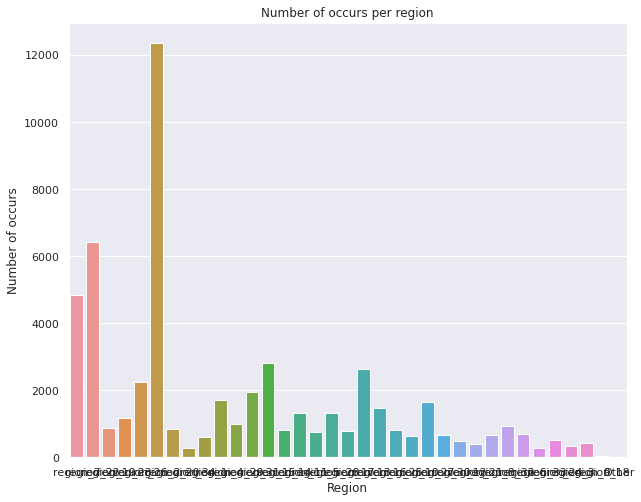

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['region'])
plt.xlabel("Region")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per region')
plt.show()

Não diz muito, talvez podemos tirar alguma conclusão quando cruzarmos com os dados numéricos. Assim como a feature Department, a coluna Other é irrelevante comparada as outras colunas.

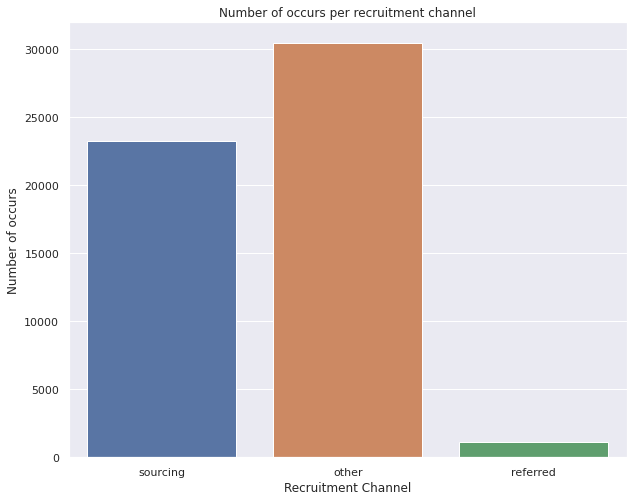

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['recruitment_channel'])
plt.xlabel("Recruitment Channel")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per recruitment channel')
plt.show()

Não diz muito, talvez podemos tirar alguma conclusão quando cruzarmos com os dados numéricos.

## Lidando com os dados faltantes de Education, Department e Region
Como podemos ver nos gráficos acima, as duas últimas colunas apresentam uma categoria "Other", isso não é interessante quando se trata de treinar um modelo pois são dados não explicativos sobre o dataset. Tendo isso em vista, precisamos substituir ou excluir esses dados "especiais".

Para a categoria "Department", podemos ver pelo código abaixo que possui 25 entradas com este valor. Podemos remover essas entradas.

In [ ]:
len(df[df['department'] == 'Other'])

25

In [ ]:
indexOthers = df[ df['department'] == 'Other'].index
df.drop(indexOthers , inplace=True)

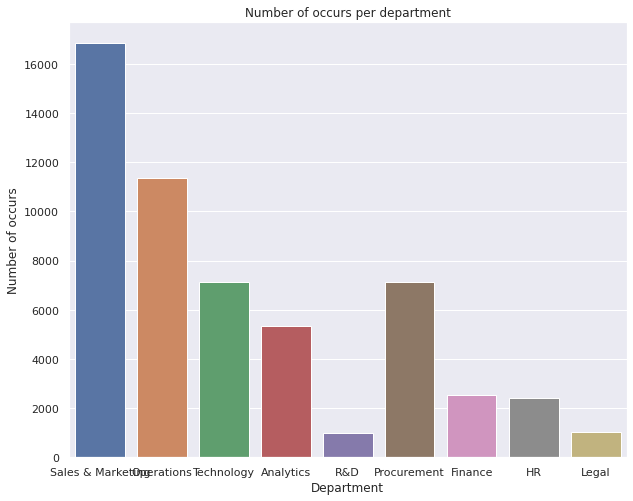

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['department'])
plt.xlabel("Department")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per department')
plt.show()

**OBSERVAÇÃO**: É importante notar que existem diversas maneiras de substuir um valor faltante ou impreciso dentro de um dataset. Não existe uma "maneira correta", cada caso é um caso e e deve ser analisado.

Agora, para a categoria "Region", trata-se de somente 4 entradas com "Other", podemos simplesmente remover essas entradas também.

In [ ]:
len(df[df['region'] == 'Other'])

4

In [ ]:
indexOthers = df[ df['region'] == 'Other'].index
df.drop(indexOthers , inplace=True)

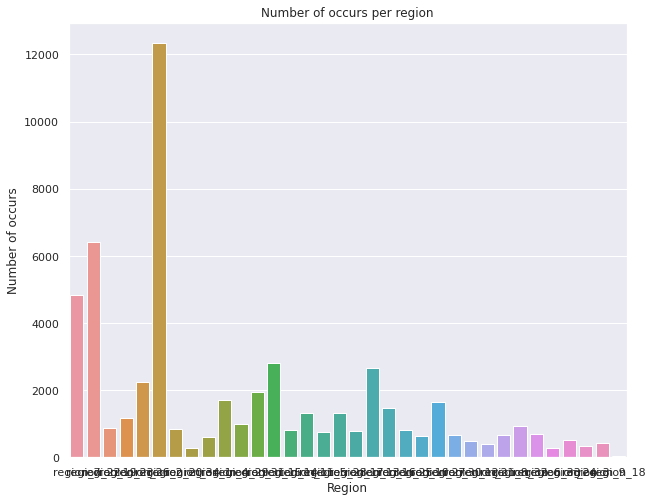

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['region'])
plt.xlabel("Region")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per region')
plt.show()

Agora, vamos analisar quantos dados estão como NaN na coluna Education.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54779 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54779 non-null  object 
 1   region                54779 non-null  object 
 2   education             52370 non-null  object 
 3   gender                54779 non-null  object 
 4   recruitment_channel   54779 non-null  object 
 5   no_of_trainings       49935 non-null  float64
 6   age                   54779 non-null  int64  
 7   previous_year_rating  50659 non-null  float64
 8   length_of_service     54779 non-null  int64  
 9   awards_won?           54779 non-null  int64  
 10  avg_training_score    47324 non-null  float64
 11  is_promoted           54779 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 7.4+ MB


Pela tabela acima, notamos que são mais de 2000 dados faltantes. Desse modo, irei substituir os espaços vazios pela moda (Bachelor's).

In [ ]:
df['education'] = df['education'].fillna("Bachelor's")

In [ ]:
print("EDUCATION column unique values:")
print(pd.Series(df.education.unique()), end='\n\n')

EDUCATION column unique values:
0    Master's & above
1          Bachelor's
2     Below Secondary
dtype: object



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54779 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54779 non-null  object 
 1   region                54779 non-null  object 
 2   education             54779 non-null  object 
 3   gender                54779 non-null  object 
 4   recruitment_channel   54779 non-null  object 
 5   no_of_trainings       49935 non-null  float64
 6   age                   54779 non-null  int64  
 7   previous_year_rating  50659 non-null  float64
 8   length_of_service     54779 non-null  int64  
 9   awards_won?           54779 non-null  int64  
 10  avg_training_score    47324 non-null  float64
 11  is_promoted           54779 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 7.4+ MB


# Dados Numéricos
Vamos agora investigar superficialmente os dados numéricos. De maneira similar ao que fizemos para os dados categóricos, vamos começar utilizando o método `describe`.

In [ ]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,49935.000000,54779.000000,50659.000000,54779.000000,54779.000000,47324.000000,54779.000000
mean,1.256574,273.647383,3.329339,5.866500,0.022709,63.514876,0.085087
std,0.612822,5423.996136,1.260037,4.265647,0.148977,13.492592,0.279014
min,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
# Vamos utilizando ".T" (transpose), pois como temos muitas features é melhor de visualizar os dados dessa forma.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,49935.0,1.256574,0.612822,1.0,1.0,1.0,1.0,10.0
age,54779.0,273.647383,5423.996136,-32.0,29.0,33.0,39.0,123456.0
previous_year_rating,50659.0,3.329339,1.260037,1.0,3.0,3.0,4.0,5.0
length_of_service,54779.0,5.866500,4.265647,1.0,3.0,5.0,7.0,37.0
awards_won?,54779.0,0.022709,0.148977,0.0,0.0,0.0,0.0,1.0
avg_training_score,47324.0,63.514876,13.492592,39.0,51.0,60.0,77.0,99.0
is_promoted,54779.0,0.085087,0.279014,0.0,0.0,0.0,0.0,1.0


Analisando com calma os dados acima, podemos ver um grande problema com a coluna de idade (age) que apresenta média de 273, mínima de -32 e máxima de 123456. Vamos analisá-la com mais calma. Veja:

###Coluna age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



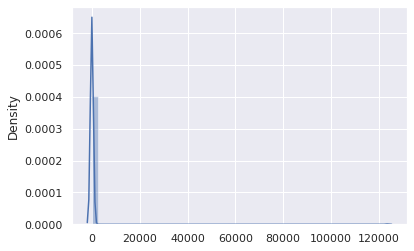

In [ ]:
sns.distplot(x = df['age'].dropna())

Podemos ver que o fato de uma pessoa apresentar uma idade tão alta, chega a distorcer o gráfico de idades, vamos então excluir valores menores que zero e maiores que 110. Esses valores que estão muito discrepantes dos demais são chamados de **outliers**.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



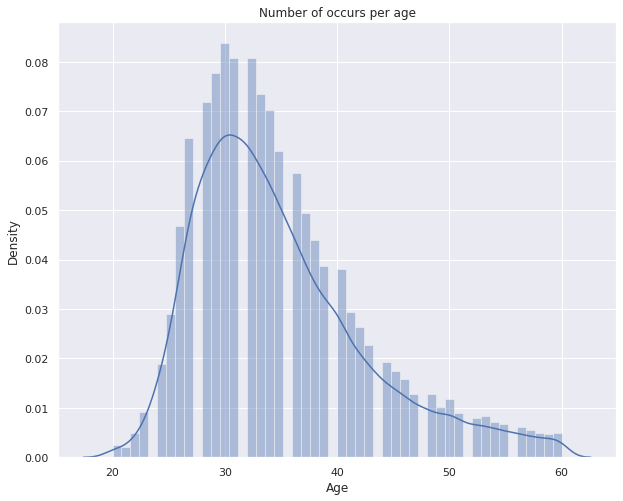

In [ ]:
df = df[df['age'] > 0]
df = df[df['age'] <= 110]
# ou
df = df.query('0<age<110')

#vamos plotar novamente o gráfico e ver o que mudou
plt.figure(figsize=(10,8))
sns.distplot(x=df['age'].dropna())
plt.xlabel("Age")
plt.ylabel("Density")
plt.title('Number of occurs per age')
plt.show()

Pronto! Arrumamos a tabela que estava com problemas. vamos visualizar a distribuição dos dados de tal coluna utilizando um outro tipo de gráfico: **Boxplot**!

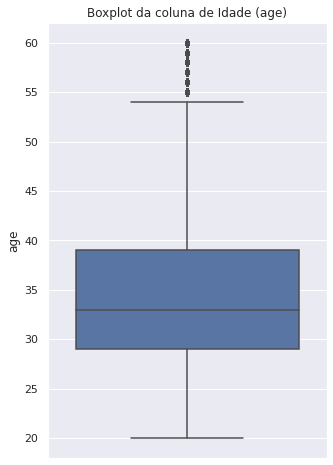

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df['age'])
plt.title("Boxplot da coluna de Idade (age)")
plt.show()

Com o boxplot, podemos identificar alguns outliers (pontos fora do boxplot) contudo, não deveríamos retirá-los, uma vez que essa idades são até cabíveis para nosso dataset. Dessa forma, é importante notar que **outliers não necessariamente são dados que devem ser retirados do seu dataset**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54670 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54670 non-null  object 
 1   region                54670 non-null  object 
 2   education             54670 non-null  object 
 3   gender                54670 non-null  object 
 4   recruitment_channel   54670 non-null  object 
 5   no_of_trainings       49850 non-null  float64
 6   age                   54670 non-null  int64  
 7   previous_year_rating  50593 non-null  float64
 8   length_of_service     54670 non-null  int64  
 9   awards_won?           54670 non-null  int64  
 10  avg_training_score    47240 non-null  float64
 11  is_promoted           54670 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 5.4+ MB


###Coluna length of service

Outra feature que podemos analisar é length_of_service a qual apresenta muitos outliers. Entretanto os valores são consistentes como vemos abaixo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



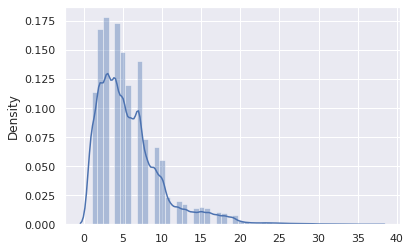

In [ ]:
sns.distplot(x = df['length_of_service'].dropna())

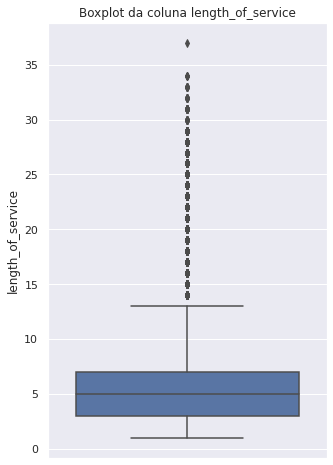

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df['length_of_service'])
plt.title("Boxplot da coluna length_of_service")
plt.show()

###Coluna no of trainings

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



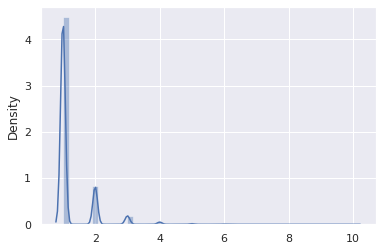

In [ ]:
sns.distplot(x = df['no_of_trainings'].dropna())

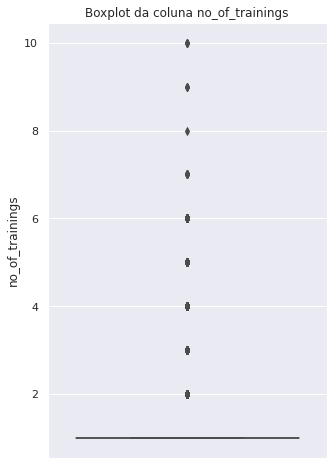

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df['no_of_trainings'])
plt.title("Boxplot da coluna no_of_trainings")
plt.show()

Observamos que há vários outliers. Além disso há muitos dados faltantes:

In [ ]:
print("NO_OF_TRAININGS column unique values:")
print(pd.Series(df.no_of_trainings.unique()), end='\n\n')

NO_OF_TRAININGS column unique values:
0      1.0
1      2.0
2      NaN
3      3.0
4      4.0
5      7.0
6      5.0
7      6.0
8      8.0
9     10.0
10     9.0
dtype: float64



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54670 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54670 non-null  object 
 1   region                54670 non-null  object 
 2   education             54670 non-null  object 
 3   gender                54670 non-null  object 
 4   recruitment_channel   54670 non-null  object 
 5   no_of_trainings       49850 non-null  float64
 6   age                   54670 non-null  int64  
 7   previous_year_rating  50593 non-null  float64
 8   length_of_service     54670 non-null  int64  
 9   awards_won?           54670 non-null  int64  
 10  avg_training_score    47240 non-null  float64
 11  is_promoted           54670 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 5.4+ MB


In [ ]:
len(df[df['no_of_trainings']==1])

40260

Desse modo, como notamos que há grande densidade no valor 1 (moda). Desse modo, irei substituir os dados faltantes por 1.

In [ ]:
df['no_of_trainings'] = df['no_of_trainings'].fillna(1)

In [ ]:
print("NO_OF_TRAININGS column unique values:")
print(pd.Series(df.no_of_trainings.unique()), end='\n\n')

NO_OF_TRAININGS column unique values:
0     1.0
1     2.0
2     3.0
3     4.0
4     7.0
5     5.0
6     6.0
7     8.0
8    10.0
9     9.0
dtype: float64



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54670 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54670 non-null  object 
 1   region                54670 non-null  object 
 2   education             54670 non-null  object 
 3   gender                54670 non-null  object 
 4   recruitment_channel   54670 non-null  object 
 5   no_of_trainings       54670 non-null  float64
 6   age                   54670 non-null  int64  
 7   previous_year_rating  50593 non-null  float64
 8   length_of_service     54670 non-null  int64  
 9   awards_won?           54670 non-null  int64  
 10  avg_training_score    47240 non-null  float64
 11  is_promoted           54670 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 5.4+ MB


###Coluna previous year rating

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



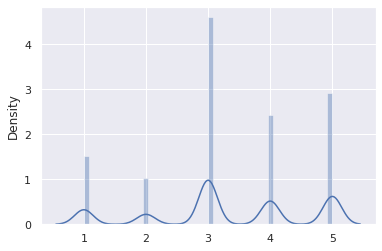

In [ ]:
sns.distplot(x = df['previous_year_rating'].dropna())

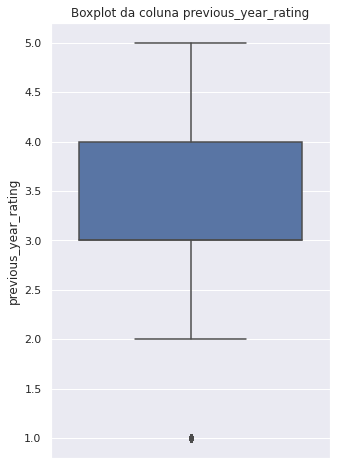

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df['previous_year_rating'])
plt.title("Boxplot da coluna previous_year_rating")
plt.show()

In [ ]:
len(df[df['previous_year_rating']==1])

5091

Observamos que esta coluna apresenta um outlier no ponto 1. Apesar disso, é um dado consistente e podemos considerá-lo na nossa análise. Além disso há uma quantidade de dados faltantes consideravelmente grandes. Assim, substituirei pela moda (3)

In [ ]:
print("PREVIOUS_YEAR_RATING column unique values:")
print(pd.Series(df.previous_year_rating.unique()), end='\n\n')

PREVIOUS_YEAR_RATING column unique values:
0    5.0
1    3.0
2    1.0
3    4.0
4    NaN
5    2.0
dtype: float64



In [ ]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(3)

In [ ]:
#atualizado
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54670 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54670 non-null  object 
 1   region                54670 non-null  object 
 2   education             54670 non-null  object 
 3   gender                54670 non-null  object 
 4   recruitment_channel   54670 non-null  object 
 5   no_of_trainings       54670 non-null  float64
 6   age                   54670 non-null  int64  
 7   previous_year_rating  54670 non-null  float64
 8   length_of_service     54670 non-null  int64  
 9   awards_won?           54670 non-null  int64  
 10  avg_training_score    47240 non-null  float64
 11  is_promoted           54670 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 5.4+ MB


###Coluna awards won

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



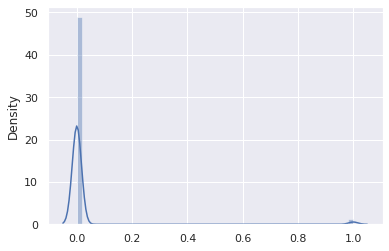

In [ ]:
sns.distplot(x = df['awards_won?'].dropna())

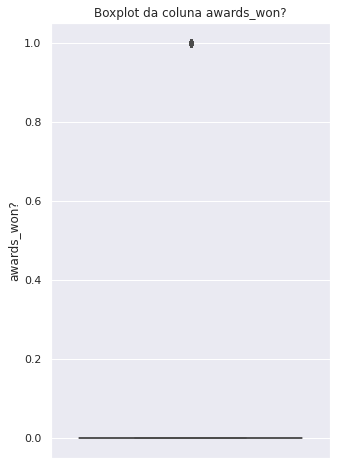

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df['awards_won?'])
plt.title("Boxplot da coluna awards_won?")
plt.show()

In [ ]:
len(df[df['awards_won?']==1])

1240

Observamos que esta coluna apresenta um outlier no ponto 1, assim como na coluna previous_year_rating. Apesar disso, é um dado que pode ter alta influência na target, então podemos considerá-lo na nossa análise.

###Coluna de Média nas Avaliações de Treinamento Atuais

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



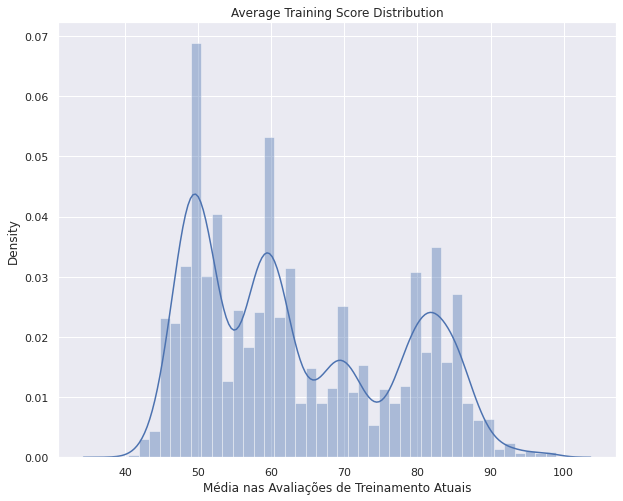

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['avg_training_score'].dropna())
plt.xlabel("Média nas Avaliações de Treinamento Atuais")
plt.ylabel("Density")
plt.title('Average Training Score Distribution')
plt.show()

Observamos que a densidade da média das avaliações estão bastante distribuídas no gráfico, isto é, não apresenta um único valor onde se concentra maior parte da densidade. 

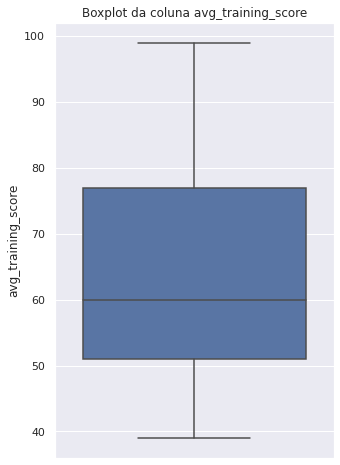

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df['avg_training_score'])
plt.title("Boxplot da coluna avg_training_score")
plt.show()

Ademais, notamos que há dados faltantes (e não são poucos). Vamos analisar a média e a moda desta coluna.

In [ ]:
df['avg_training_score'].mean()

63.52114733276884

In [ ]:
df['avg_training_score'].mode()

0    50.0
dtype: float64

Como a moda está relativamente distante da média, então vou preencher os espaços vazios pela média aritmética da moda e da média dessa coluna (50+63)/2 = 56 (aproximadamente).

In [ ]:
df['avg_training_score'] = df['avg_training_score'].fillna(56)

In [ ]:
print("avg_training_score column unique values:")
print(pd.Series(df.avg_training_score.unique()), end='\n\n')

avg_training_score column unique values:
0     49.0
1     60.0
2     50.0
3     73.0
4     85.0
      ... 
56    43.0
57    95.0
58    97.0
59    41.0
60    98.0
Length: 61, dtype: float64



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



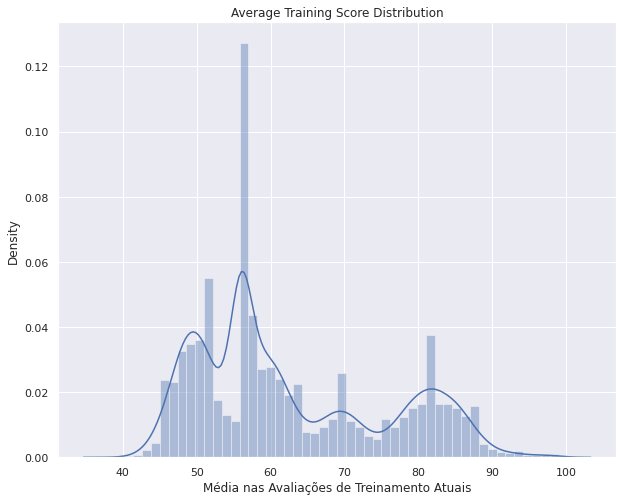

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['avg_training_score'].dropna())
plt.xlabel("Média nas Avaliações de Treinamento Atuais")
plt.ylabel("Density")
plt.title('Average Training Score Distribution')
plt.show()

###Matriz de Correlação

També podemos explorar a correlação entre colunas por meio de uma Matriz de Correlação, algo que vocês já viram

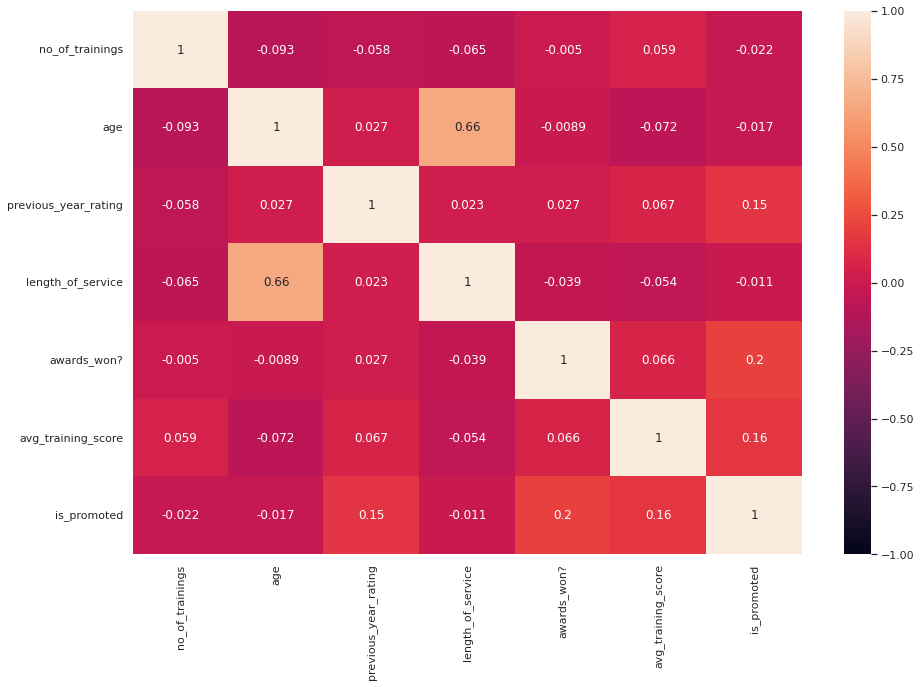

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

## Stripplots
Stripplots são gráficos interessantes, principalmente quando combinados com outras informações prévias do seu dataset. Eles mostram como os dados são distribuídos por determinadas variáveis categóricas, demonstrando possíveis correlacionamentos.

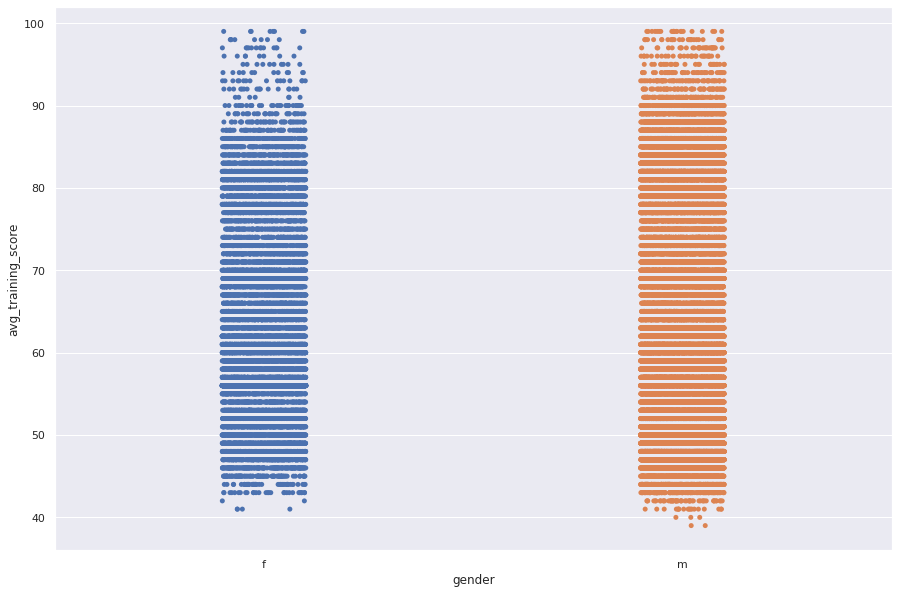

In [ ]:
plt.figure(figsize=(15,10))
sns.stripplot(x="gender", y="avg_training_score", data=df)
plt.show()

O gráfico acima mostra que a média de pontos do treinamento em ambos os gêneros são bastante similares.

#Predição dos Dados

Iremos seguir os seguintes passos para montar um modelo de predicação.

##Regressão Linear

###Importando bibliotecas necessárias para a predicação

In [ ]:
# para os modelos de predição
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # separação entre base de treino e de teste
from sklearn.linear_model import LinearRegression  # modelo que vamos usar

### Dividir nossos dados em treino e teste

In [ ]:
X = df.iloc[:, 5:11].values #valores para o treino

y = df.iloc[:, 11].values #valores esperados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train)

0.07574853304664664

Acurácia extremamente baixa, portanto esse método é ineficiente.

In [ ]:
y_test_predict = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# avaliando o modelo nos dados de treino
y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


print("Perfomance do modelo para os dados de treino")
print("--------------------------------------")
print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')
print("\n")

# avaliando o modelo nos dados de teste
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Perfomance do modelo para os dados de teste")
print("--------------------------------------")
print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')
print("\n")

Perfomance do modelo para os dados de treino
--------------------------------------
RMSE: 0.26830314170228653
R2 score: 0.07574853304664664


Perfomance do modelo para os dados de teste
--------------------------------------
RMSE: 0.26627747328186296
R2 score: 0.0888909467787985




A performance do modelo no teste está bastante próximo do modelo treino, por isso está razoavelmente bom (apesar de idealmente queremos um RMSE maior e R-Quadrado/R2 menor).

## Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df.iloc[:, 5:11].values #valores para o treino

y = df.iloc[:, 11].values #valores esperados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Treinar o modelo

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Testar o modelo

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

print(f'Acurácio no treino: {accuracy_score(y_train, y_train_predict)}')
print(f'Acurácio no teste: {accuracy_score(y_test, y_test_predict)}')

Acurácio no treino: 0.9183412161279364
Acurácio no teste: 0.9187854399122005


Acurária está ótima. Portanto a regressão logística está predizendo melhor os funcionários a serem promovidos, comparado à regressão linear (com acurácia extremamente baixa).

##Árvore de decisão (Exemplo 1)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 5:11].values #valores para o treino

y = df.iloc[:, 11].values #valores esperados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=0,
    max_depth=3,
    min_samples_leaf=5
)

clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)

In [ ]:
y_predict = clf_model.predict(X_test)

In [ ]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

###Avaliação do modelo

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9221388939698799

### Visualizando nossa árvore! 
O SKLearn permite com que plotemos nossa árvore de decisão após o treinamento. Para isso basta importar o módulo `plot_tree` e passar nosso modelo treinado como parâmetro. Veja:

[Text(0.5, 0.875, 'X[5] <= 89.5\ngini = 0.154\nsamples = 13667\nvalue = [12519, 1148]'),
 Text(0.25, 0.625, 'X[4] <= 0.5\ngini = 0.141\nsamples = 13508\nvalue = [12478, 1030]'),
 Text(0.125, 0.375, 'X[2] <= 4.5\ngini = 0.131\nsamples = 13245\nvalue = [12308, 937]'),
 Text(0.0625, 0.125, 'gini = 0.1\nsamples = 10467\nvalue = [9913, 554]'),
 Text(0.1875, 0.125, 'gini = 0.238\nsamples = 2778\nvalue = [2395, 383]'),
 Text(0.375, 0.375, 'X[2] <= 4.5\ngini = 0.457\nsamples = 263\nvalue = [170, 93]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 207\nvalue = [145, 62]'),
 Text(0.4375, 0.125, 'gini = 0.494\nsamples = 56\nvalue = [25, 31]'),
 Text(0.75, 0.625, 'X[5] <= 90.5\ngini = 0.383\nsamples = 159\nvalue = [41, 118]'),
 Text(0.625, 0.375, 'X[2] <= 4.5\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(0.5625, 0.125, 'gini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(0.6875, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.875, 0.375, 'X[5] <= 93.5\ngini = 0.268\nsamples 

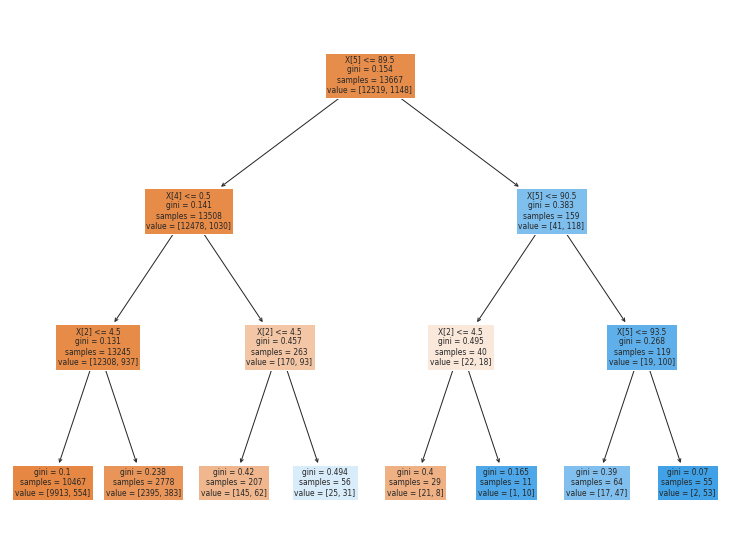

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(13, 10))
plot_tree(clf_model, filled=True)

##Árvore de decisão (Exemplo 2)

### Dividindo os dados e montando os datasets de treino e validação

In [ ]:
X = df.iloc[:, 5:11].values #valores para o treino

y = df.iloc[:, 11].values #valores esperados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
clf_model_2 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=0,
    max_depth=5
)
clf_model_2.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
y_predict = clf_model_2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

0.9232973599170782

##Random Forest

###Bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Divisão dos dados e construção do modelo
Uma vez que organizamos nossos dados, podemos separá-lo utilizando o método `train_test_split` do scikit-learn e fazer o treinamento de nossa Random Forest utilizando o módulo `RandomForestClassifier`.

In [ ]:
X = df.iloc[:, 5:11].values #valores para o treino

y = df.iloc[:, 11].values #valores esperados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=0
)

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=0)

###Avaliação do modelo

In [ ]:
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.922
Mean accuracy score: 0.924


Observamos que a acurácia desse modelo está próximo de 1, desse modo torna-se eficiente para a predição do nosso dataset.

[Text(0, 0.5, 'Income > 50 K'), Text(0, 1.5, 'Income < 50 K')]

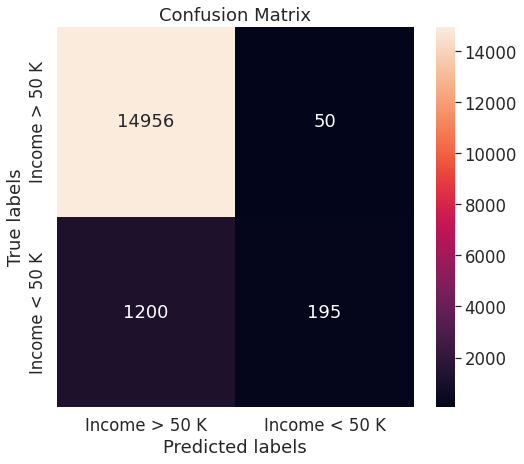

In [ ]:
cm = confusion_matrix(y_test, predicted)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])
ax.yaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])

## Naive Bayes

###Implementação

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = df.iloc[:, 5:11].values #valores para o treino

y = df.iloc[:, 11].values #valores esperados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 1 0]


In [ ]:
print(accuracy_score(y_test, y_predict))

0.9121771577689437
